<a href="https://colab.research.google.com/github/ayshaw/Dog-Breed-Project/blob/master/milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pylab as plt
import matplotlib.image as mping
import os
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import multiprocessing
import cv2
from keras.utils import to_categorical
print(multiprocessing.cpu_count())
# Imports keras
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

from keras.applications import resnet50
!nvidia-smi
!ls "/content/drive/My Drive/"
os.chdir('/content/drive/My Drive/')

Using TensorFlow backend.


2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wed Dec 12 01:51:51 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+------------------------------------

# Make dataframe of classifications, images, and train/test split

In [0]:
# # Scrape information from AKC website
# page = requests.get('https://www.akc.org/dog-breeds/sporting/page/3')
# soup = BeautifulSoup(page.content,'html.parser')
# name_links = soup.select_one('select."custom-select__select"').select('option')[1:]
# group_map = {}
# for p in name_links:
#     link = p.get('value')
#     l_soup = BeautifulSoup(requests.get(link).content,'html.parser')
#     group_map[p.text.lower()]=l_soup.select_one('li > span > a').text

In [0]:
# # Classify and correct every groups
# cls=os.listdir('/content/drive/My Drive/Images/')
# #cls = !ls "/content/drive/My Drive/fall2018/ac209a/ac209_final/Images/"
# print(cls)
# cls = [c.split('-')[1].replace('_',' ') for c in cls]
# groups1 = {}
# groups2 = {}
# first_word = [re.split(' |-',c)[0] for c in group_map.keys()]
# count1 = 0
# count2 = 0
# for c in cls:
#     if c.lower() in group_map.keys():
#         groups1[c.lower()] = group_map[c.lower()]
#     elif c.split(' ')[0].lower() in first_word:
#         idx = first_word.index(c.split(' ')[0].lower())
#         groups2[c.lower()] = list(group_map.values())[idx]
#         count1 += 1
#     else:
#         print(c)
#         count2 += 1
# groups3 = {}
# groups3['pekinese'] = 'Toy Group'
# groups3['leonberg'] = 'Working Group'
# groups3['african hunting dog'] = 'NAN' # Not sure about this one, suspect it is Basenji Dog
# groups3['blenheim spaniel'] = 'Toy Group' # Also known as Cavalier King Charles Spaniel
# groups3['walker hound'] = 'Hound Group' # Full name is Treeing Walker Coonhound
# groups3['scotch terrier'] = 'Terrier Group' # aka Scottish Terrier
# groups3['groenendael'] = 'Herding Group' # A branch of Belgian Sheepdog
# groups3['malinois'] = 'Herding Group' # Formally as Belgian Malinois
# groups3['kelpie'] = 'Foundation Stock Service' # Formally as Australian Kelpie
# groups3['eskimo dog'] = 'Non-Sporting Group' # Formally as American Eskimo Dog
# groups3['malamute'] = 'Working Group' # Formally as Alaskan Malamute
# groups3['brabancon griffon'] = 'Hybrid' # Brabancon and Brussels Griffon hybrid
# groups3['mexican hairless'] = 'Non-Sporting Group' # Formally as Xoloitzcuintli
# groups3['dingo'] = 'NAN' # Originally considered as wolf, now believed to be a independent branch
# groups3['dhole'] = 'NAN' # ALso close to wolf, not clear which superclass it belongs to
# # groups2['Boston bull'] is the only one in American Kennel website starting with Boston, assume it's the one
# # groups2['English springer'] is labeled correctly for the wrong reason
# groups2['german shepherd'] = 'Herding Group'
# groups2['german short'] = 'Sporting Group'
# groups2['basset'] = 'Hound Group'
# groups2['bull mastiff'] = 'Working Group'
# groups2['miniature poodle'] = 'Non-Sporting Group'
# groups2['standard poodle'] = 'Non-Sporting Group'
# groups2['toy poodle'] = 'Non-Sporting Group' # Assuming that toy poodle is a kind of poodle anyways
# # groups2['wire'] is wire-haired fox terrier, assume it's the same as wire fox terrier, though there is a group of wirehaired
# groups = {**groups1,**groups2,**groups3}

['n02085620-Chihuahua', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02090379-redbone', 'n02090622-borzoi', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091467-Norwegian_elkhound', 'n02091831-Saluki', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093991-Irish_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coat

In [0]:
# # key is breed name and value is list containing the 10 images this is the same thing above, 
# #we accidentally had 2 group members do the same thing which was making a dictionary of values of breed to breed class
# file_type=pd.read_csv('file',header=None,names=['filename','type'])
# file_type['annotations']=['Annotation/'+i.replace('.jpg','') for i in file_type.filename.values]
# file_type['breed']=[i.split('/')[0].split('-')[1] for i in file_type.filename.values]
# a_ = np.zeros((file_type.filename.values.shape[0],4))
# file_type['breed_class']=[groups[i.lower().replace('_',' ')] for i in file_type.breed.values]
# for index,row in file_type.iterrows():
#     with open(row['annotations'],'r') as fp:
#                 soup = BeautifulSoup(fp.read(),'html.parser')
#                 xmin = int(soup.select_one('xmin').text)
#                 xmax = int(soup.select_one('xmax').text)
#                 ymin = int(soup.select_one('ymin').text)
#                 ymax = int(soup.select_one('ymax').text)
#                 img = [ymin,ymax,xmin,xmax]
#                 a_[index,:]=img
# file_type=pd.concat([file_type,pd.DataFrame(a_,columns=['ymin','ymax','xmin','xmax'])],axis=1)

# train_files=pd.read_csv('train',header=None)[0].values
# test_files=pd.read_csv('test',header=None)[0].values

# file_type['train/test']='test'
# file_type.loc[file_type.filename.isin(train_files),'train/test']='train'
# file_type.head()

,filename,type,annotations,breed,breed_class,ymin,ymax,xmin,xmax,train/test
0,n02085620-Chihuahua/n02085620_10074.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10074,Chihuahua,Toy Group,10.0,498.0,25.0,276.0,test
1,n02085620-Chihuahua/n02085620_10131.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10131,Chihuahua,Toy Group,9.0,493.0,49.0,393.0,test
2,n02085620-Chihuahua/n02085620_10621.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10621,Chihuahua,Toy Group,43.0,250.0,142.0,335.0,train
3,n02085620-Chihuahua/n02085620_1073.jpg,1,Annotation/n02085620-Chihuahua/n02085620_1073,Chihuahua,Toy Group,27.0,498.0,0.0,312.0,test
4,n02085620-Chihuahua/n02085620_10976.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10976,Chihuahua,Toy Group,104.0,452.0,90.0,242.0,train


In [0]:
# ls "drive/My Drive/fall2018/ac209a/ac209_final/Annotation/n02085782-Japanese_spaniel/" 
# import sys
# sys.path.append('drive/My Drive/fall2018/ac209a/ac209_final/')
# !pwd

In [0]:
# # save dataframe out
# file_type.to_csv('ds_all.csv')

# Making Images

In [0]:
count = 0
img_all = []
width_tot=[]
height_tot=[]
for h,_,fs in os.walk('Images/'):
    for f in fs:
        if f.endswith('.jpg'):
            img = mping.imread(h+'/'+f)
            img_all.append(img)
    count += 1
    print(count)
    if count>5:
        break
    

1
2
3
4
5
6


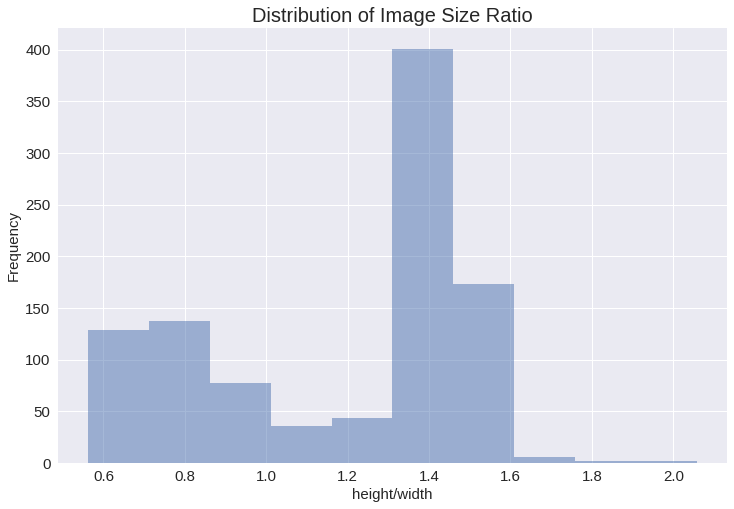

In [0]:
ratio_tot=[]
for im in img_all:
    width, height, depth = im.shape
    ratio = height/width
    ratio_tot.append(ratio)
    
plt.figure(figsize=(12,8))
plt.hist(ratio_tot, alpha =0.5)
#plt.hist(height_tot, alpha =0.5, label= "height")
plt.xlabel("height/width", size =15)
plt.ylabel("Frequency", size =15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Distribution of Image Size Ratio", fontsize =20)
#plt.legend(prop={'size':15})
plt.savefig('distribution_size.png')

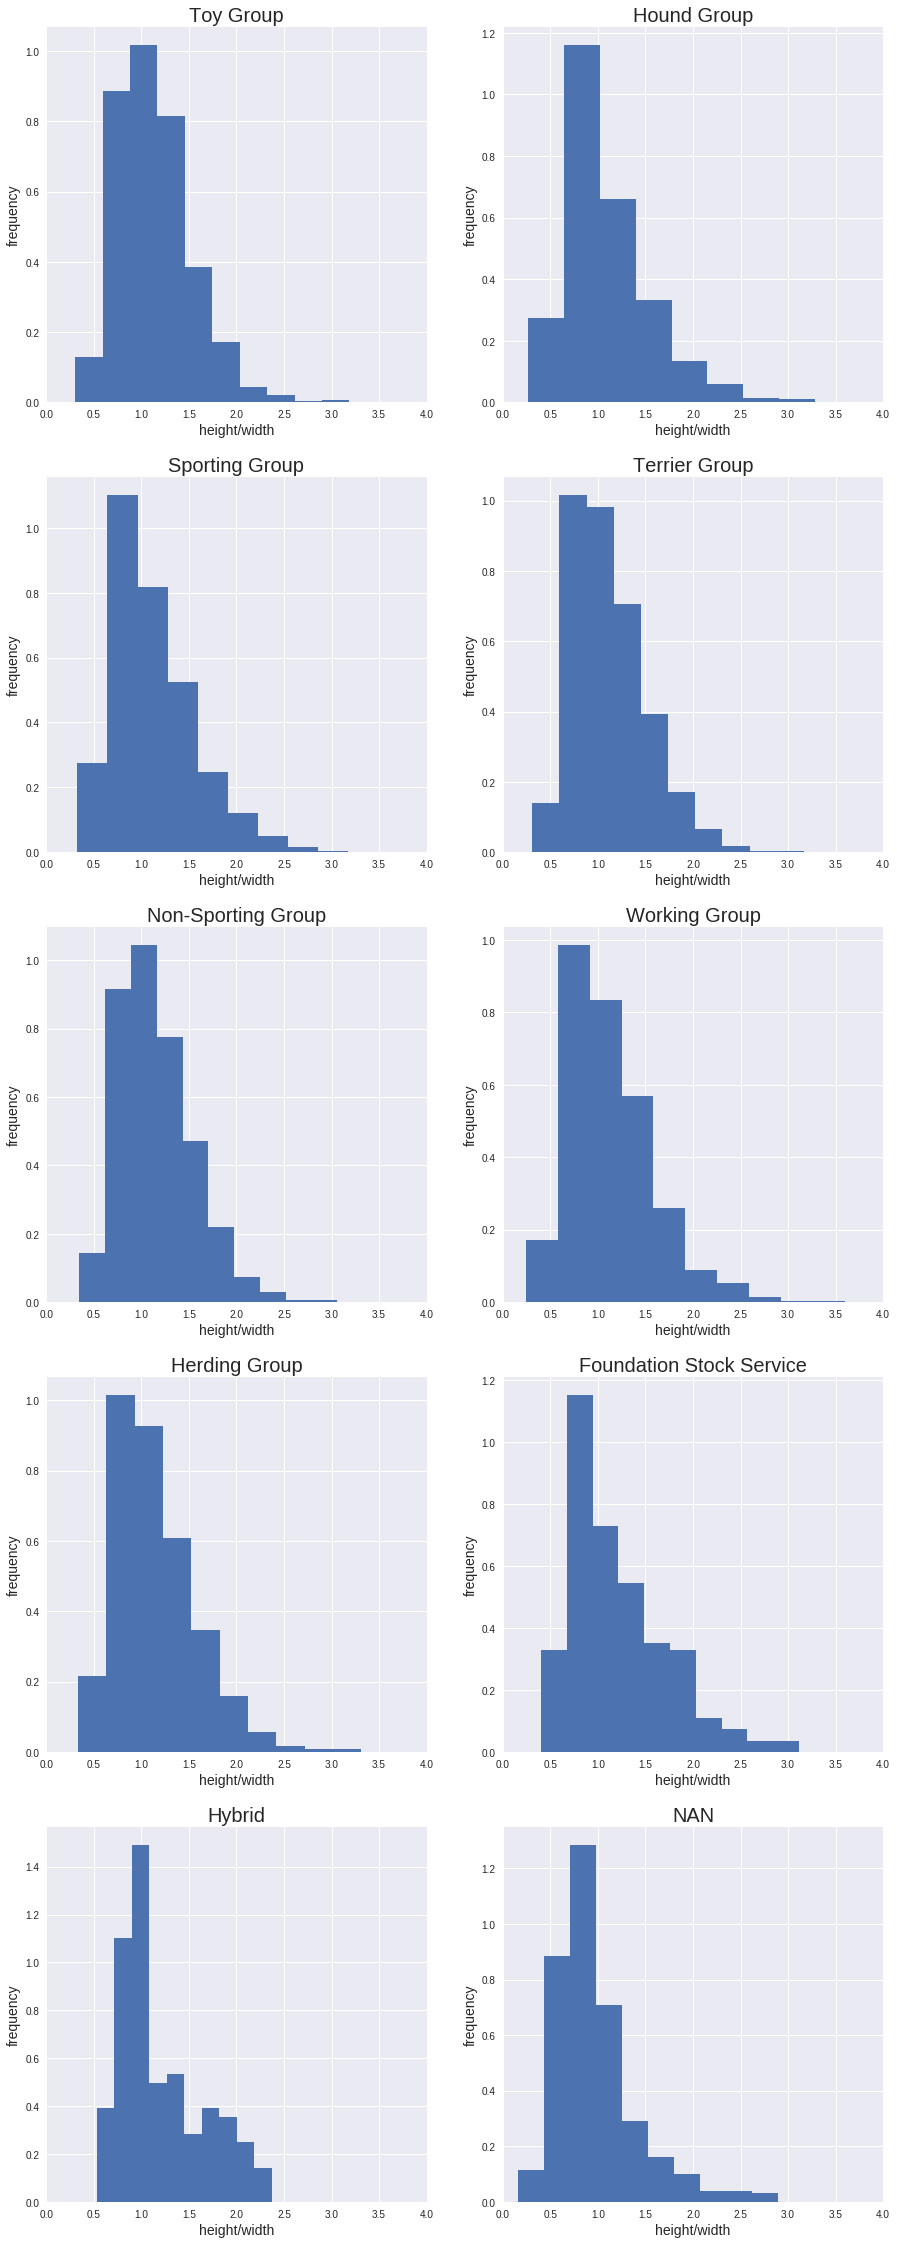

In [0]:
file_type=pd.read_csv('ds_all.csv',index_col=0)
file_type.head()
fig,axs=plt.subplots(nrows=int(len(file_type.breed_class.unique())/2),ncols=2,figsize=[15,40])
axs=axs.flatten()
for i,class_i in enumerate(file_type.breed_class.unique()):
    df = file_type.loc[file_type.breed_class==class_i].reset_index()
    ratios_y_x=np.zeros(df.values.shape[0])
    for index,row in df.iterrows():
        ratios_y_x[index]=(row['ymin']-row['ymax'])/(row['xmin']-row['xmax'])
    axs[i].hist(ratios_y_x,normed=True)
    axs[i].set_xlabel('height/width',fontsize=14)
    axs[i].set_ylabel('frequency',fontsize=14)
    axs[i].set_title(class_i,fontsize=20)
    axs[i].set_xlim([0,4])
plt.savefig('annotated_fig_ratio.png')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


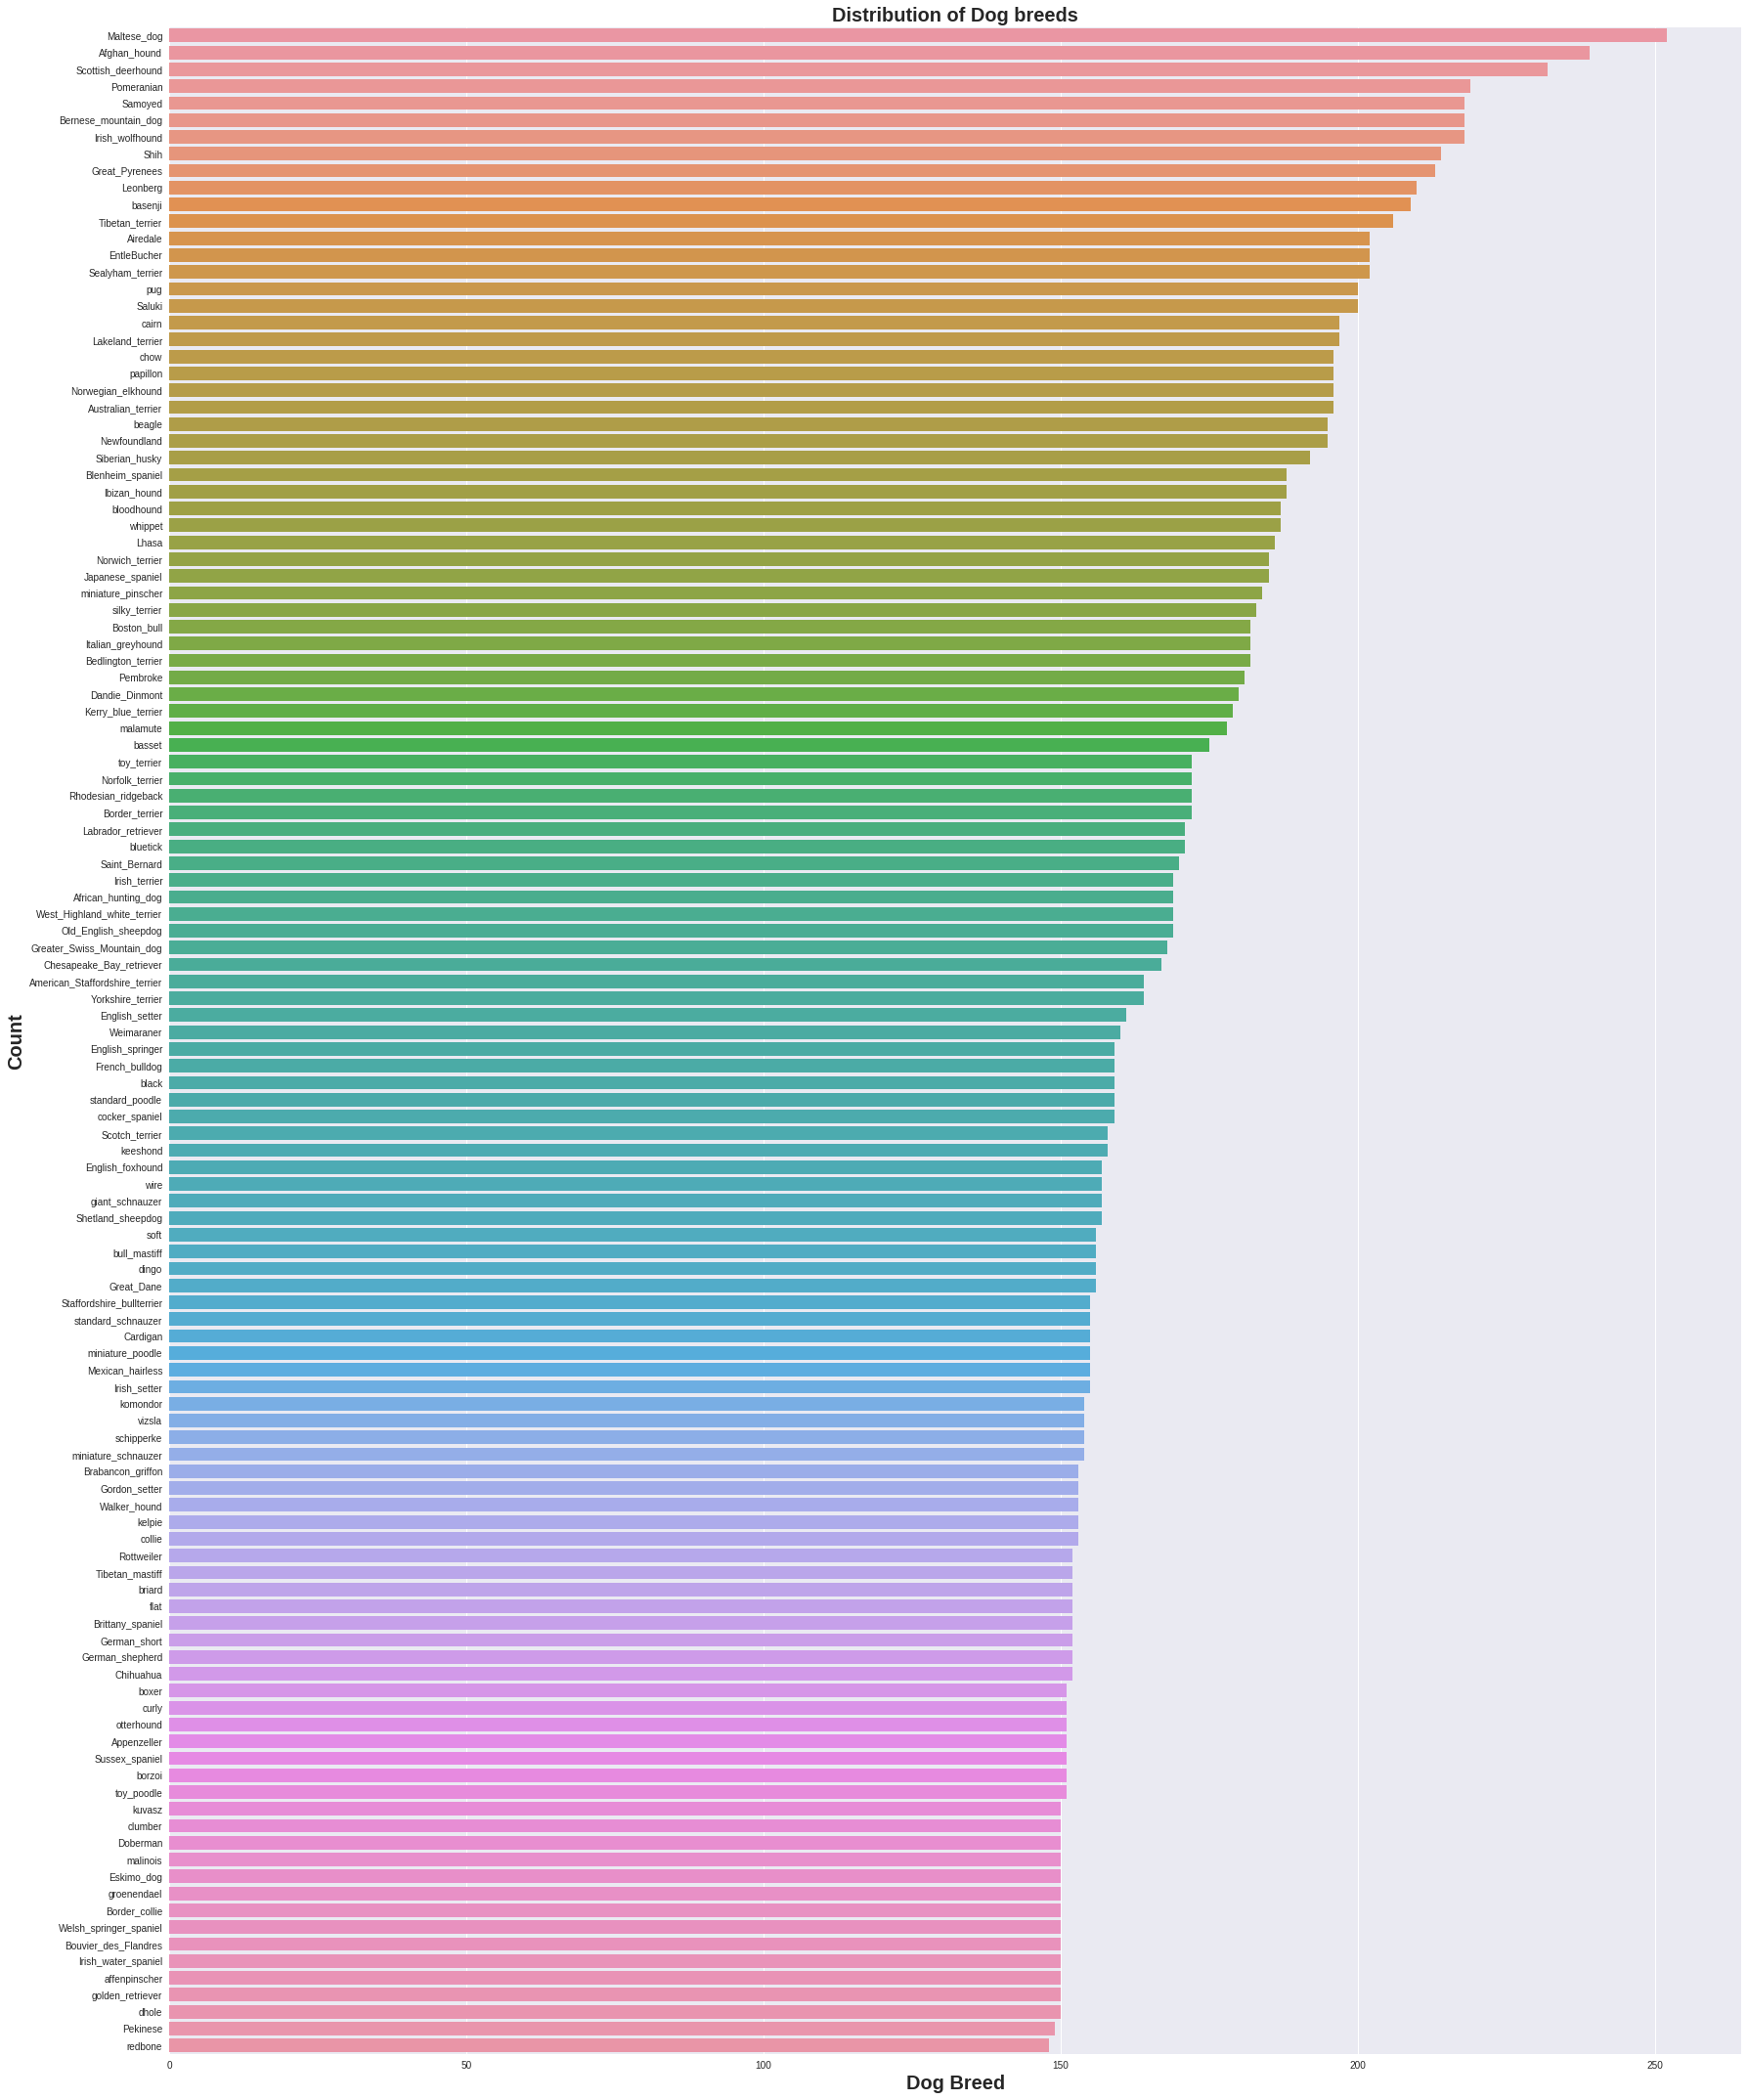

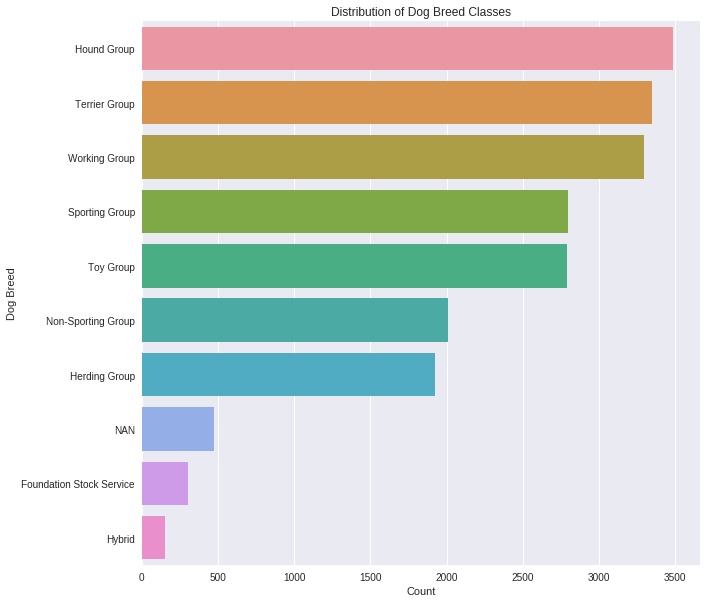

In [0]:
yy=file_type['breed'].value_counts()
fig, ax = plt.subplots()
fig.set_size_inches(25, 30)
sns.set()
ax = sns.barplot(y = yy.index, x = yy, data = file_type,orient='h')
#ax.set_xticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 8)
ax.set_xlabel('Dog Breed',fontsize=20,fontweight='bold')
ax.set_ylabel('Count',fontsize=20,fontweight='bold')
ax.set_title('Distribution of Dog breeds',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.savefig('distribution_breeds.png')
yy=file_type['breed_class'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set()
ax = sns.barplot(y = yy.index, x = yy, data = file_type,orient='h')
#ax.set_xticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 8)
ax.set(ylabel='Dog Breed', xlabel='Count')
ax.set_title('Distribution of Dog Breed Classes')
plt.savefig('distribution_class.png',fontsize=20)

[Text(0,0,'Toy Group'),
 Text(0,0,'Hound Group'),
 Text(0,0,'Sporting Group'),
 Text(0,0,'Terrier Group'),
 Text(0,0,'Non-Sporting Group'),
 Text(0,0,'Working Group'),
 Text(0,0,'Herding Group'),
 Text(0,0,'Foundation Stock Service'),
 Text(0,0,'Hybrid'),
 Text(0,0,'NAN')]

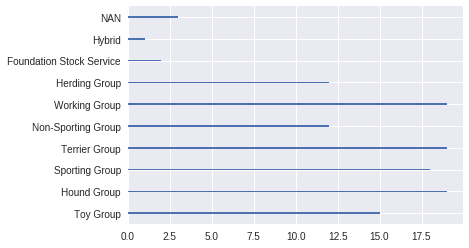

In [0]:
# distribution of breeds per breed class:
fig, ax = plt.subplots()
file_type=pd.read_csv('ds_all.csv',index_col=0) # load the dataframe
breeds_per_class=np.zeros(len(file_type.breed_class.unique()))
for tick_class, class_b in enumerate(file_type.breed_class.unique()):
  breeds_per_class[tick_class] = len(file_type.loc[file_type.breed_class==class_b,'breed'].unique())
y_pos=np.linspace(0,100,len(file_type.breed_class.unique()))
ax.barh(y_pos,breeds_per_class,)
ax.set_yticks(y_pos)
ax.set_yticklabels(file_type.breed_class.unique())

# Saving Images out in resized form


In [0]:
def resize2(im,desired_size=250):
    old_size = im.shape[:2] 
    ratio = float(desired_size)/min(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im2 = cv2.resize(im, (new_size[1], new_size[0]))
    if im2.shape[0]>250:
        mid=int(im2.shape[0]/2)
        lt=mid-125
        rt=mid+125
        im3=im2[lt:rt,:,:]
    else:
        mid=int(im2.shape[1]/2)
        lt=mid-125
        rt=mid+125
        im3=im2[:,lt:rt,:]
    im4=cv2.resize(im3,(250,250))
    return im4

def resize3(im,desired_size=250):
    old_size = im.shape[:2] 
    idx = np.argmax(old_size)
    new_size = np.zeros(2)
    new_size[0] = int((desired_size*old_size[0])/old_size[idx])
    new_size[1] = int((desired_size*old_size[1])//old_size[idx])
    new_size[idx] = int(desired_size)
    im2 = cv2.resize(im, (int(new_size[1]), int(new_size[0])))
    if im2.shape[0]<desired_size:
        im3 = np.zeros((desired_size,desired_size,im2.shape[-1]))
        im3[:im2.shape[0],:,:]=im2
    else:
        im3 = np.zeros((desired_size,desired_size,im2.shape[-1]))
        im3[:,:im2.shape[1],:]=im2[:,:,:]
    return im3[:,:,:3].astype('int')

In [0]:
# dog_dir=os.listdir('Images/')
# dog_dir
# for i in range(len(dog_dir)):
#   if not os.path.exists('Images_scaled/'+dog_dir[i]):
#       os.makedirs('Images_scaled/'+dog_dir[i])

In [0]:
file_type=pd.read_csv('ds_all.csv',index_col=0)
file_type.head()

,filename,type,annotations,breed,breed_class,ymin,ymax,xmin,xmax,train/test
0,n02085620-Chihuahua/n02085620_10074.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10074,Chihuahua,Toy Group,10.0,498.0,25.0,276.0,test
1,n02085620-Chihuahua/n02085620_10131.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10131,Chihuahua,Toy Group,9.0,493.0,49.0,393.0,test
2,n02085620-Chihuahua/n02085620_10621.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10621,Chihuahua,Toy Group,43.0,250.0,142.0,335.0,train
3,n02085620-Chihuahua/n02085620_1073.jpg,1,Annotation/n02085620-Chihuahua/n02085620_1073,Chihuahua,Toy Group,27.0,498.0,0.0,312.0,test
4,n02085620-Chihuahua/n02085620_10976.jpg,1,Annotation/n02085620-Chihuahua/n02085620_10976,Chihuahua,Toy Group,104.0,452.0,90.0,242.0,train


In [0]:
# for index,row in file_type.iloc[12963:,:].iterrows():
#     img=resize3(cv2.imread('Images/'+row['filename'])[int(row['ymin']):int(row['ymax']),int(row['xmin']):int(row['xmax']),:])
    
#     cv2.imwrite('Images_scaled/'+row['filename'],img)
#     print(index)
#     if index==0: 
#       x_train=im
#     else:
#       x_train=np.append(x_train,im,axis=3)

In [0]:
np.sum(file_type['train/test']=='train')

12000

# Making Models

In [0]:
x_train=np.load('x_train_scaled.npy')

##Baseline Model

In [0]:
# Building a simple CNN - BASELINE MODEL
cnn_md1 = Sequential([
    Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',use_bias=True,kernel_initializer='normal',input_shape=(64,64,3,)),
    Conv2D(32,kernel_size=(7,7),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    MaxPooling2D(strides=(2,2)),
    Conv2D(64,kernel_size=(5,5),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    Conv2D(64,kernel_size=(5,5),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    MaxPooling2D(strides=(2,2)),
    Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    MaxPooling2D(strides=(2,2)),
    Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    MaxPooling2D(strides=(2,2)),
    Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',use_bias=True,kernel_initializer='normal'),
    MaxPooling2D(strides=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(8,activation='softmax')
])
cnn_md1.compile('adam','categorical_crossentropy',['acc'])

In [0]:
history1 = cnn_md1.fit(X_train,y_train,batch_size=32,epochs=15,validation_split=0.2)

Train on 288 samples, validate on 72 samples
Epoch 1/15
288/288 [==============================] - 43s 149ms/step - loss: 14.1552 - acc: 0.1215 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 2/15
288/288 [==============================] - 42s 146ms/step - loss: 13.4317 - acc: 0.1667 - val_loss: 14.1033 - val_acc: 0.1250

In [0]:
# ann_md2 = Sequential([
#     Dense(128,input_shape=(250,250,3,),activation='relu'),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dense(8,activation='softmax')
# ])
# ann_md2.compile('sgd','categorical_crossentropy',['acc'])
# history2 = ann_md2.fit(X_train,y_train,batch_size=1,epochs=15,validation_split=0.2)

### Data Augmentation

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
cnn_md1.fit_generator(datagen.flow(X_train_scaled, y_train, batch_size=32),
                    steps_per_epoch=len(X_train_scaled) / 32, epochs=15)

Epoch 1/15
12/11 [================================] - 51s 4s/step - loss: 13.6033 - acc: 0.1558
Epoch 2/15
12/11 [======================

In [0]:
resnet_md = ResNet50(input_shape=(64,64,3,),classes=8,include_top=True,weights=None)
resnet_md.compile('adam','categorical_crossentropy',['acc'])
history3 = resnet_md.fit(X_train_scaled,y_train,batch_size=24,epochs=15,validation_split=0.2)

ValueError: Input size must be at least 197x197; got `input_shape=(64, 64, 3)`